# Profit Prediction with Machine Learning

The profit earned by a company for a particular period depends on several factors like how much time and money a company spends on R&D, marketing and many more. So for predicting the profit of a company for a particular period we need to train a machine learning model with a dataset that contains historical data about the profit generated by the company.

The task of predicting profit is an important task for every business to set an achievable goal. For example, if the business spends 500dollars on marketing, it can’t expect a profit of 20,000 dollars. Likewise, there are many other factors on which the profit of a business depends. A company must therefore set a goal that can be achieved. In the section below, I will walk you through the task of profit prediction with machine learning using Python.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"E:\Data sets\Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

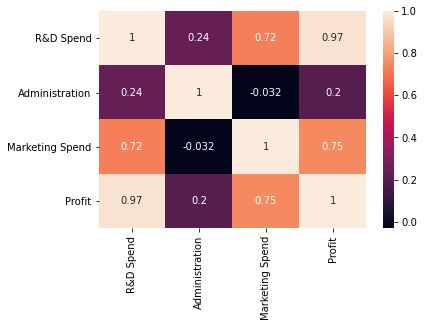

In [6]:
# Now let’s have a look at the correlation between the features:
sns.heatmap(data.corr(),annot = True)
plt.show()

As this task is based on the problem of regression so I will be using the Linear regression algorithm to train the profit prediction model. So let’s prepare the data so that we can fit it into the model:

In [9]:
x = data[['R&D Spend','Administration','Marketing Spend']]
y = data[['Profit']]

In [10]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Profit":ypred.flatten()})
print(data.head())

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344
